**1. Data Preprocessing and Cleaning**

In [1]:
# 1.Load the dataset into a pandas DataFrame.
import pandas as pd
df = pd.read_parquet("green_tripdata_2024-07.parquet")

print(df.head())


   VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
0         2  2024-07-01 00:44:19   2024-07-01 01:14:35                  N   
1         2  2024-07-01 00:26:06   2024-07-01 00:51:58                  N   
2         2  2024-07-01 00:36:44   2024-07-01 00:46:07                  N   
3         2  2024-07-01 00:35:40   2024-07-01 00:47:47                  N   
4         2  2024-07-01 00:36:53   2024-07-01 00:56:58                  N   

   RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
0         1.0            80           100              2.0           8.20   
1         1.0            66            89              1.0           7.87   
2         1.0           129           260              1.0           0.96   
3         1.0            42           120              1.0           5.73   
4         1.0           152           185              1.0           8.62   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount  ehail_fee  \
0  

In [2]:
import pandas as pd

# Set display options for better readability
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)        # Adjust display width
pd.set_option('display.max_colwidth', 50)   # Set max column width

# Show the first 10 rows of the DataFrame for better understanding
print(df.head(10))

   VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  fare_amount  extra  mta_tax  tip_amount  tolls_amount  ehail_fee  improvement_surcharge  total_amount  payment_type  trip_type  congestion_surcharge
0         2  2024-07-01 00:44:19   2024-07-01 01:14:35                  N         1.0            80           100              2.0           8.20         38.0    1.0      0.5        2.00           0.0        NaN                    1.0         45.25           1.0        1.0                  2.75
1         2  2024-07-01 00:26:06   2024-07-01 00:51:58                  N         1.0            66            89              1.0           7.87         36.6    1.0      0.5        7.82           0.0        NaN                    1.0         46.92           1.0        1.0                  0.00
2         2  2024-07-01 00:36:44   2024-07-01 00:46:07                  N         1.0           129           26

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51837 entries, 0 to 51836
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               51837 non-null  int32         
 1   lpep_pickup_datetime   51837 non-null  datetime64[us]
 2   lpep_dropoff_datetime  51837 non-null  datetime64[us]
 3   store_and_fwd_flag     50228 non-null  object        
 4   RatecodeID             50228 non-null  float64       
 5   PULocationID           51837 non-null  int32         
 6   DOLocationID           51837 non-null  int32         
 7   passenger_count        50228 non-null  float64       
 8   trip_distance          51837 non-null  float64       
 9   fare_amount            51837 non-null  float64       
 10  extra                  51837 non-null  float64       
 11  mta_tax                51837 non-null  float64       
 12  tip_amount             51837 non-null  float64       
 13  t

In [4]:
# 2. Handle missing values: decide on the strategy (remove, fill, interpolate) and justify your choice.

# Select only numerical columns to fill missing values with the mean
numerical_cols = df.select_dtypes(include=['number']).columns

# Fill missing values only in numerical columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# For categorical columns, fill with the mode (most common category)
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Verify that there are no more missing values
print(df.isnull().sum())  # So, this should print 0 for all columns


VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag           0
RatecodeID                   0
PULocationID                 0
DOLocationID                 0
passenger_count              0
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                51837
improvement_surcharge        0
total_amount                 0
payment_type                 0
trip_type                    0
congestion_surcharge         0
dtype: int64


<ipython-input-4-f9de27f7c383>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


It looks like the column ehail_fee has 51,837 missing values, while the other columns have no missing values.

In [5]:
# Drop the ehail_fee column
df.drop(columns=['ehail_fee'], inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51837 entries, 0 to 51836
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               51837 non-null  int32         
 1   lpep_pickup_datetime   51837 non-null  datetime64[us]
 2   lpep_dropoff_datetime  51837 non-null  datetime64[us]
 3   store_and_fwd_flag     51837 non-null  object        
 4   RatecodeID             51837 non-null  float64       
 5   PULocationID           51837 non-null  int32         
 6   DOLocationID           51837 non-null  int32         
 7   passenger_count        51837 non-null  float64       
 8   trip_distance          51837 non-null  float64       
 9   fare_amount            51837 non-null  float64       
 10  extra                  51837 non-null  float64       
 11  mta_tax                51837 non-null  float64       
 12  tip_amount             51837 non-null  float64       
 13  t

In [6]:
# 3. From datetime column (e.g., lpep_pickup_datetime, lpep_dropoff_datetime), extract month, weekday, hour.
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['lpep_pickup_month'] = df['lpep_pickup_datetime'].dt.month
df['lpep_pickup_weekday'] = df['lpep_pickup_datetime'].dt.weekday
df['lpep_pickup_hour'] = df['lpep_pickup_datetime'].dt.hour

df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])
df['lpep_dropoff_month'] = df['lpep_dropoff_datetime'].dt.month
df['lpep_dropoff_weekday'] = df['lpep_dropoff_datetime'].dt.weekday
df['lpep_dropoff_hour'] = df['lpep_dropoff_datetime'].dt.hour


In [7]:
print(df.head())

   VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  fare_amount  extra  mta_tax  tip_amount  tolls_amount  improvement_surcharge  total_amount  payment_type  trip_type  congestion_surcharge  lpep_pickup_month  lpep_pickup_weekday  lpep_pickup_hour  lpep_dropoff_month  lpep_dropoff_weekday  lpep_dropoff_hour
0         2  2024-07-01 00:44:19   2024-07-01 01:14:35                  N         1.0            80           100              2.0           8.20         38.0    1.0      0.5        2.00           0.0                    1.0         45.25           1.0        1.0                  2.75                  7                    0                 0                   7                     0                  1
1         2  2024-07-01 00:26:06   2024-07-01 00:51:58                  N         1.0            66            89              1.0           7.87         36.6    1.0      0.5        7.82      

**2. Exploratory Data Analysis (EDA)**

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51837 entries, 0 to 51836
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               51837 non-null  int32         
 1   lpep_pickup_datetime   51837 non-null  datetime64[us]
 2   lpep_dropoff_datetime  51837 non-null  datetime64[us]
 3   store_and_fwd_flag     51837 non-null  object        
 4   RatecodeID             51837 non-null  float64       
 5   PULocationID           51837 non-null  int32         
 6   DOLocationID           51837 non-null  int32         
 7   passenger_count        51837 non-null  float64       
 8   trip_distance          51837 non-null  float64       
 9   fare_amount            51837 non-null  float64       
 10  extra                  51837 non-null  float64       
 11  mta_tax                51837 non-null  float64       
 12  tip_amount             51837 non-null  float64       
 13  t

In [9]:
# 1. Descriptive statistics for numerical columns
df.describe()



,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,lpep_pickup_month,lpep_pickup_weekday,lpep_pickup_hour,lpep_dropoff_month,lpep_dropoff_weekday,lpep_dropoff_hour
count,51837.000000,51837,51837,51837.000000,51837.000000,51837.000000,51837.000000,51837.000000,51837.00000,51837.000000,51837.000000,51837.000000,51837.000000,51837.000000,51837.000000,51837.000000,51837.000000,51837.000000,51837.000000,51837.000000,51837.000000,51837.000000,51837.000000,51837.000000
mean,1.877925,2024-07-16 20:44:33.689064,2024-07-16 21:03:18.104269,1.237935,96.093273,143.065552,1.332982,11.284958,18.78478,0.938982,0.573794,2.601314,0.238973,0.979893,24.770771,1.298021,1.049285,0.849805,7.000463,2.687964,14.118197,7.000694,2.690318,14.198719
min,1.000000,2024-06-30 23:55:13,2024-07-01 00:12:56,1.000000,1.000000,1.000000,0.000000,0.000000,-120.00000,-5.000000,-0.500000,-0.010000,0.000000,-1.000000,-121.000000,1.000000,1.000000,-2.750000,6.000000,0.000000,0.000000,7.000000,0.000000,0.000000
25%,2.000000,2024-07-09 15:32:06,2024-07-09 15:49:36,1.000000,74.000000,75.000000,1.000000,1.160000,10.00000,0.000000,0.500000,0.000000,0.000000,1.000000,13.900000,1.000000,1.000000,0.000000,7.000000,1.000000,10.000000,7.000000,1.000000,10.000000
50%,2.000000,2024-07-16 20:54:02,2024-07-16 21:16:27,1.000000,75.000000,140.000000,1.000000,1.920000,14.20000,0.000000,0.500000,2.000000,0.000000,1.000000,19.600000,1.000000,1.000000,0.000000,7.000000,2.000000,15.000000,7.000000,2.000000,15.000000
75%,2.000000,2024-07-24 11:09:15,2024-07-24 11:33:00,1.000000,97.000000,229.000000,1.000000,3.370000,21.20000,2.500000,0.500000,3.840000,0.000000,1.000000,28.440000,2.000000,1.000000,2.750000,7.000000,4.000000,18.000000,7.000000,4.000000,18.000000
max,2.000000,2024-08-01 23:43:58,2024-08-01 23:52:36,99.000000,265.000000,265.000000,9.000000,127756.430000,780.70000,7.750000,4.250000,111.000000,34.200000,1.000000,782.200000,5.000000,2.000000,2.750000,8.000000,6.000000,23.000000,8.000000,6.000000,23.000000
std,0.327376,NaN,NaN,1.621803,57.744115,76.752289,0.990637,714.359023,19.83973,1.412585,0.367415,3.440142,1.344793,0.153000,21.824883,0.481743,0.213058,1.248528,0.022391,1.958753,5.310112,0.026344,1.959815,5.395494


In [10]:
# Descriptive statistics for categorical columns
df.describe(include=['object'])

,store_and_fwd_flag
count,51837
unique,2
top,N
freq,51758


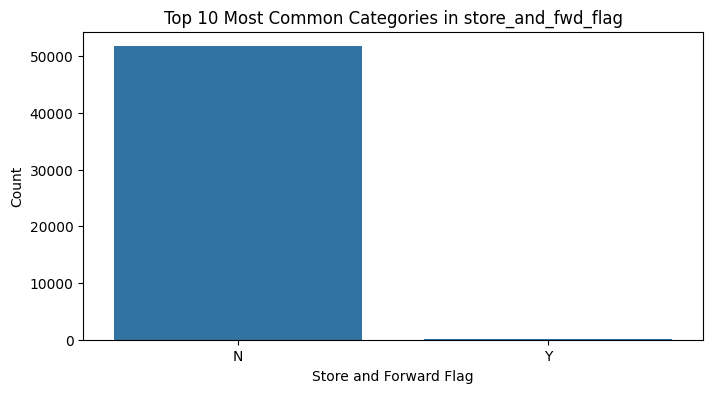

In [11]:
# 2. Identify and Plot Distribution of Top 10 Most Common Categories
import matplotlib.pyplot as plt
import seaborn as sns
# For the categorical column 'store_and_fwd_flag'
top_categories_store_and_fwd = df['store_and_fwd_flag'].value_counts().nlargest(10)
plt.figure(figsize=(8, 4))
sns.barplot(x=top_categories_store_and_fwd.index, y=top_categories_store_and_fwd.values)
plt.title('Top 10 Most Common Categories in store_and_fwd_flag')
plt.xlabel('Store and Forward Flag')
plt.ylabel('Count')
plt.show()


In [12]:
top_categories_store_and_fwd

,count
store_and_fwd_flag,
N,51758
Y,79


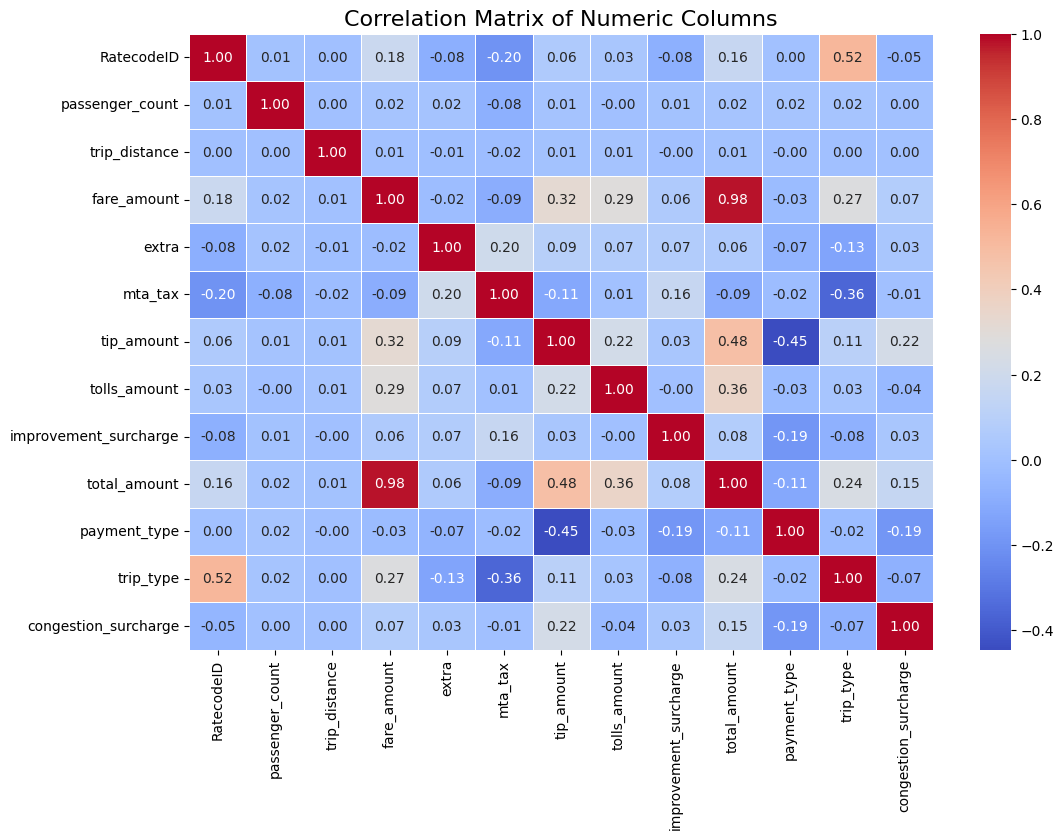

In [13]:
# 3. Visualize the correlation matrix of the numeric columns and identify any potential collinearity.
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for the correlation matrix
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix for numeric columns
correlation_matrix = numeric_df.corr()

# Set up the figure size
plt.figure(figsize=(12, 8))

# Creating  a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Adding the title
plt.title('Correlation Matrix of Numeric Columns', size=16)

# Show the plot
plt.show()


Insights-
1. Total Amount and Fare Amount: Correlation of 0.98, indicating a very strong positive relationship. This means that as the fare amount increases, the total amount almost always increases as well (which makes sense since the fare is part of the total).
2.Payment Type and Tip Amount: Correlation of -0.45, indicating a moderate negative correlation. This suggests that different payment types (e.g., cash and card) may influence how much is tipped.
3. Trip Type and RatecodeID: Correlation of 0.52, which is a moderate positive correlation.

**3. Advanced Filtering and Grouping**

In [14]:
# 1. Identify the top 5 records where [specific column, e.g., 'trip_distance'] is above the 95th percentile.
# Calculate the 95th percentile of the 'trip_distance' column
percentile_95 = df['trip_distance'].quantile(0.95)

# Filter the DataFrame to get rows where 'trip_distance' is greater than the 95th percentile
top_5_trip_distance = df[df['trip_distance'] > percentile_95].nlargest(5, 'trip_distance')

# Display the top 5 records
print(top_5_trip_distance)


       VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  fare_amount  extra  mta_tax  tip_amount  tolls_amount  improvement_surcharge  total_amount  payment_type  trip_type  congestion_surcharge  lpep_pickup_month  lpep_pickup_weekday  lpep_pickup_hour  lpep_dropoff_month  lpep_dropoff_weekday  lpep_dropoff_hour
50365         2  2024-07-04 10:39:00   2024-07-04 10:44:00                  N    1.237935            41           151         1.332982      127756.43        12.80    0.0      0.0        1.33          0.00                    1.0         15.13      1.298021   1.049285              0.849805                  7                    3                10                   7                     3                 10
50278         2  2024-07-02 05:01:00   2024-07-02 05:17:00                  N    1.237935            92           132         1.332982       45825.12        38.14    0.0      0.0      

In [15]:
# 2. Group the data by [a categorical column, e.g., 'store_and_fwd_flag'] and calculate the mean and standard deviation for [a numerical column, e.g., 'trip_distance'].
grouped_data = df.groupby('store_and_fwd_flag')['trip_distance'].agg(['mean', 'std'])
print(grouped_data)




                         mean         std
store_and_fwd_flag                       
N                   11.298134  714.903907
Y                    2.652532    3.633718


In [16]:
# 3. Apply a custom function using .apply() to normalize a specific column.

# Normalize the "trip distance"
# Normalization Formula: The formula (𝑥−min)/(max−min)
# where formula, (x−min)/(max−min) scales the values between 0 and 1.
df['normalized_trip_distance'] = df['trip_distance'].apply(lambda x: (x - df['trip_distance'].min()) / (df['trip_distance'].max() - df['trip_distance'].min()))
print(df[['trip_distance', 'normalized_trip_distance']].head())


   trip_distance  normalized_trip_distance
0           8.20                  0.000064
1           7.87                  0.000062
2           0.96                  0.000008
3           5.73                  0.000045
4           8.62                  0.000067


Normalization refers to the process of adjusting values in a dataset to a common scale, typically to improve the performance of machine learning algorithms.

**4. Time Series Analysis**

In [17]:
# 1. Resample the dataset to a weekly frequency and compute the sum of [a specific column, e.g., 'trip_distance'] for each week.
weekly_sum = df.resample('W', on='lpep_pickup_datetime')['trip_distance'].sum()
print(weekly_sum)


lpep_pickup_datetime
2024-06-30         4.75
2024-07-07    276476.56
2024-07-14     94106.64
2024-07-21    105848.72
2024-07-28     65803.10
2024-08-04     42738.60
Freq: W-SUN, Name: trip_distance, dtype: float64


In [18]:
print(weekly_sum.dtypes)


float64


In [19]:
#2.
# Resample the DataFrame to calculate the weekly sum of trip distances
weekly_sum_df = df.resample('W', on='lpep_pickup_datetime')['trip_distance'].sum().reset_index()

# Rename columns for clarity
weekly_sum_df.columns = ['Week Ending', 'Total Trip Distance']


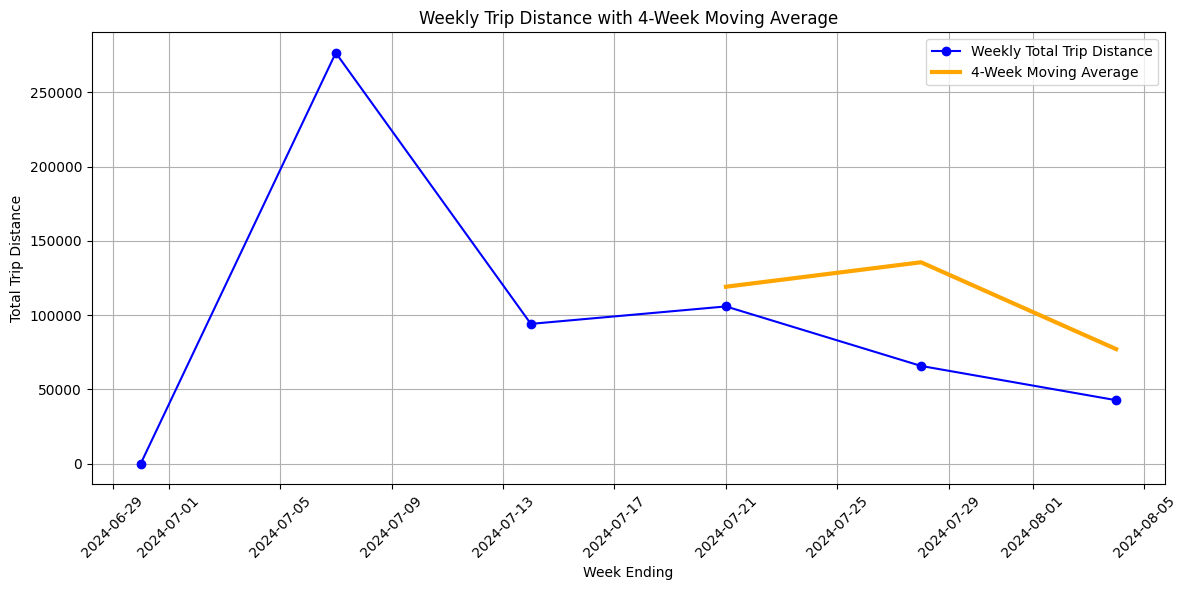

In [20]:
# 2. Identify any trends or seasonality in the resampled data using moving averages or decomposition.
import matplotlib.pyplot as plt

# Calculate the 4-week moving average
weekly_sum_df['Moving Average'] = weekly_sum_df['Total Trip Distance'].rolling(window=4).mean()

# Plot the original data and the moving average
plt.figure(figsize=(12, 6))
plt.plot(weekly_sum_df['Week Ending'],
         weekly_sum_df['Total Trip Distance'],
         label='Weekly Total Trip Distance', marker='o', color='blue')
plt.plot(weekly_sum_df['Week Ending'],
         weekly_sum_df['Moving Average'],
         label='4-Week Moving Average', color='orange', linewidth=3)

plt.title('Weekly Trip Distance with 4-Week Moving Average')
plt.xlabel('Week Ending')
plt.ylabel('Total Trip Distance')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


In [21]:
print(weekly_sum_df.head())

  Week Ending  Total Trip Distance  Moving Average
0  2024-06-30                 4.75             NaN
1  2024-07-07            276476.56             NaN
2  2024-07-14             94106.64             NaN
3  2024-07-21            105848.72     119109.1675
4  2024-07-28             65803.10     135558.7550


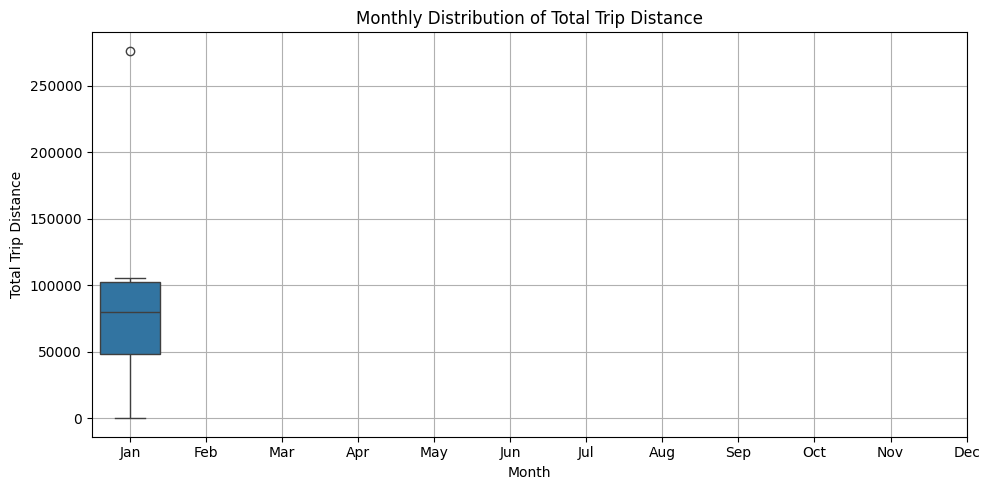

In [22]:
# 3. Visualize any identified trends or patterns.
#To specifically visualize seasonal patterns, creating  a boxplot.
import seaborn as sns
 # Check if the index is already a DatetimeIndex
if not pd.api.types.is_datetime64_any_dtype(weekly_sum_df.index):
    # If not, convert your index to DatetimeIndex.
    weekly_sum_df.index = pd.to_datetime(weekly_sum_df.index)

# Creating  a new column for month
weekly_sum_df['Month'] = weekly_sum_df.index.month

# Plot the total trip distance per month
plt.figure(figsize=(10, 5))
sns.boxplot(x='Month', y='Total Trip Distance', data=weekly_sum_df.reset_index())
plt.title('Monthly Distribution of Total Trip Distance')
plt.xlabel('Month')
plt.ylabel('Total Trip Distance')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid()
plt.tight_layout()
plt.show()


**5. MultiIndex and Pivot Tables**

In [23]:
print(df.columns)


Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime', 'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID', 'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge', 'lpep_pickup_month', 'lpep_pickup_weekday', 'lpep_pickup_hour', 'lpep_dropoff_month', 'lpep_dropoff_weekday', 'lpep_dropoff_hour', 'normalized_trip_distance'], dtype='object')


In [24]:
# 1. Create a MultiIndex DataFrame using two columns of your choice.
# Set the MultiIndex using trip_distance and fare_amount
df.set_index(['trip_distance', 'fare_amount'], inplace=True)

# Sort the index for better organization
df.sort_index(inplace=True)
# Display the MultiIndex DataFrame
print(df)



                           VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  RatecodeID  PULocationID  DOLocationID  passenger_count  extra  mta_tax  tip_amount  tolls_amount  improvement_surcharge  total_amount  payment_type  trip_type  congestion_surcharge  lpep_pickup_month  lpep_pickup_weekday  lpep_pickup_hour  lpep_dropoff_month  lpep_dropoff_weekday  lpep_dropoff_hour  normalized_trip_distance
trip_distance fare_amount                                                                                                                                                                                                                                                                                                                                                                                                                
0.00          -75.00              2  2024-07-15 12:25:48   2024-07-15 12:27:26                  N    5.000000           260           260         1.

In [25]:
print(df.columns)

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime', 'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID', 'passenger_count', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge', 'lpep_pickup_month', 'lpep_pickup_weekday', 'lpep_pickup_hour', 'lpep_dropoff_month', 'lpep_dropoff_weekday', 'lpep_dropoff_hour', 'normalized_trip_distance'], dtype='object')


lpep_pickup_month        6       7      8
lpep_pickup_datetime                     
2024-06-30 23:55:13   35.1     NaN    NaN
2024-07-01 00:01:13    NaN  100.50    NaN
2024-07-01 00:08:50    NaN    9.00    NaN
2024-07-01 00:26:06    NaN   46.92    NaN
2024-07-01 00:26:19    NaN   17.38    NaN
...                    ...     ...    ...
2024-08-01 22:12:03    NaN     NaN  26.65
2024-08-01 22:47:44    NaN     NaN  26.12
2024-08-01 23:25:02    NaN     NaN  11.10
2024-08-01 23:31:05    NaN     NaN  14.16
2024-08-01 23:43:58    NaN     NaN  18.07

[50954 rows x 3 columns]


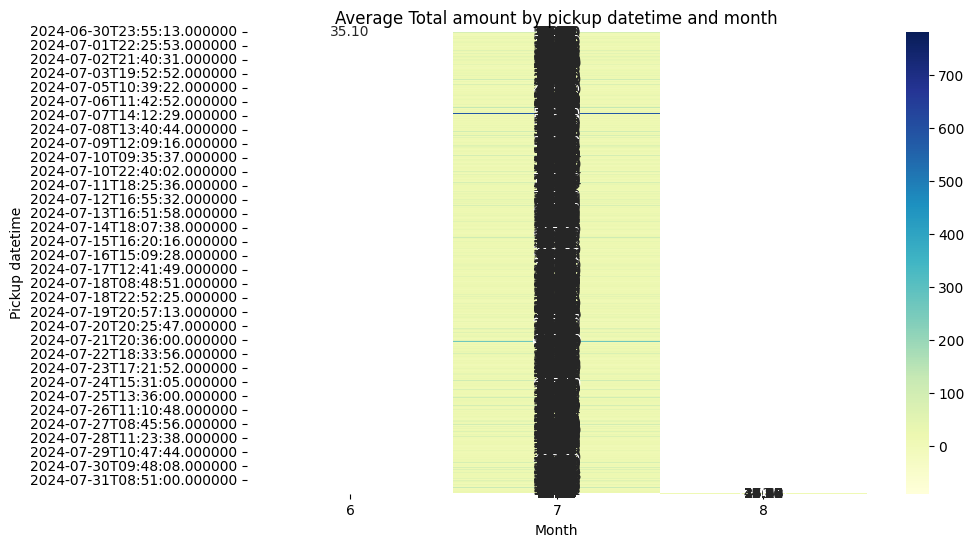

In [26]:
# 2. Construct a pivot table to analyze [a specific aspect, e.g., 'trip_duration'] across two categories (e.g., pickup datetime and month)
import pandas as pd
import numpy as np


# Step 1: Convert pickup_datetime to datetime format
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])

# Step 2: Extracting month from lpep_pickup_datetime
df['lpep_pickup_month'] = df['lpep_pickup_datetime'].dt.month

# Step 3: Creating  the pivot table
pivot_table = pd.pivot_table(
    df,
    values='total_amount',  # The aspect you want to analyze
    index='lpep_pickup_datetime',  # Row index
    columns='lpep_pickup_month',         # Column categories
    aggfunc='mean'           # You can use 'mean', 'sum', or any other aggregation function
)

# Display the pivot table
print(pivot_table)

# Optional: Visualize the pivot table using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Average Total amount by pickup datetime and month')
plt.xlabel('Month')
plt.ylabel('Pickup datetime')
plt.show()


In [27]:
print(df.columns)

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime', 'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID', 'passenger_count', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge', 'lpep_pickup_month', 'lpep_pickup_weekday', 'lpep_pickup_hour', 'lpep_dropoff_month', 'lpep_dropoff_weekday', 'lpep_dropoff_hour', 'normalized_trip_distance'], dtype='object')


**6. Optimization**

In [28]:
# 1. Identify any columns where memory optimization is possible (e.g., converting to category, using more efficient dtypes).
# 2. Apply memory reduction techniques and quantify the reduction achieved.

import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_parquet("green_tripdata_2024-07.parquet")
print(df.head())
print("\n")

# Convert lpep_pickup_datetime to datetime type for analysis
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])

# Step 1: Checking the current memory usage
print("Before optimization:")
df.info(memory_usage='deep')

# Memory usage before optimization
initial_memory = df.memory_usage(deep=True).sum()
print(f"Initial Memory Usage: {initial_memory / 1024**2:.2f} MB")

# Step 2: Identify possible optimizations
# 2.1. Convert object/string columns to category
df['tip_amount'] = df['tip_amount'].astype('category')

# 2.2. Downcast numeric columns to more efficient types
df['total_amount'] = pd.to_numeric(df['total_amount'], downcast='integer')
df['passenger_count'] = pd.to_numeric(df['passenger_count'], downcast='integer')
df['tolls_amount'] = pd.to_numeric(df['tolls_amount'], downcast='float')

# Step 3: Check memory usage after optimization
print("\nAfter optimization:")
df.info(memory_usage='deep')

# Memory usage after optimization
optimized_memory = df.memory_usage(deep=True).sum()
print(f"Optimized Memory Usage: {optimized_memory / 1024**2:.2f} MB")

# Calculate memory reduction
memory_reduction = initial_memory - optimized_memory
memory_reduction_percentage = (memory_reduction / initial_memory) * 100
print(f"Memory reduction achieved: {memory_reduction / 1024**2:.2f} MB ({memory_reduction_percentage:.2f}%)")

   VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  fare_amount  extra  mta_tax  tip_amount  tolls_amount  ehail_fee  improvement_surcharge  total_amount  payment_type  trip_type  congestion_surcharge
0         2  2024-07-01 00:44:19   2024-07-01 01:14:35                  N         1.0            80           100              2.0           8.20         38.0    1.0      0.5        2.00           0.0        NaN                    1.0         45.25           1.0        1.0                  2.75
1         2  2024-07-01 00:26:06   2024-07-01 00:51:58                  N         1.0            66            89              1.0           7.87         36.6    1.0      0.5        7.82           0.0        NaN                    1.0         46.92           1.0        1.0                  0.00
2         2  2024-07-01 00:36:44   2024-07-01 00:46:07                  N         1.0           129           26

Insights-
1. converted tip_amount to category, which helps reduce memory by replacing repeated values with category codes.
2. successfully downcast tolls_amount from float64 to float32, reducing its memory usage.
3. The memory optimization process successfully reduced the DataFrame's memory usage by 4.63% (from 9.74 MB to 9.29 MB).

**EXTRA (BONUS)**

In [29]:
print(df.columns)

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime', 'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID', 'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge', 'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge'], dtype='object')


   VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  fare_amount  extra  mta_tax tip_amount  tolls_amount  ehail_fee  improvement_surcharge  total_amount  payment_type  trip_type  congestion_surcharge condition  temperature  precipitation
0         2  2024-07-01 00:44:19   2024-07-01 01:14:35                  N         1.0            80           100              2.0           8.20         38.0    1.0      0.5       2.00           0.0        NaN                    1.0         45.25           1.0        1.0                  2.75       NaN          NaN            NaN
1         2  2024-07-01 00:26:06   2024-07-01 00:51:58                  N         1.0            66            89              1.0           7.87         36.6    1.0      0.5       7.82           0.0        NaN                    1.0         46.92           1.0        1.0                  0.00       NaN          NaN            NaN
2

<ipython-input-34-96b4699f08d8>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_fare_by_weather.index, y=avg_fare_by_weather.values, palette='coolwarm')


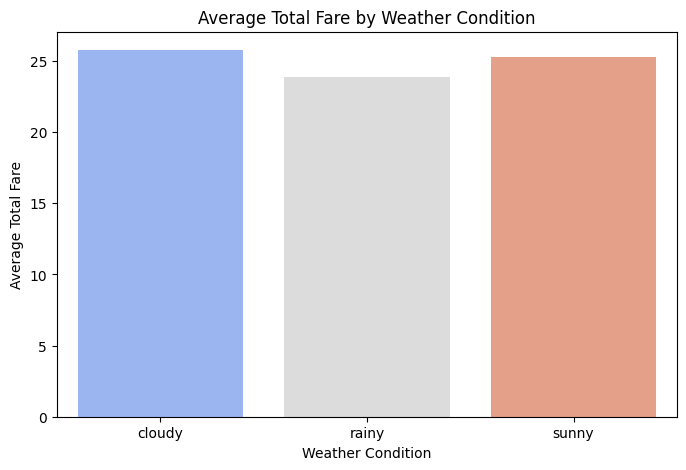

In [34]:
# External weather dataset
weather_data = {
    'date': ['2024-07-20', '2024-07-05', '2024-07-07'],
    'condition': ['sunny', 'rainy', 'cloudy'],
    'temperature': [50, 77, 80],
    'precipitation': [0.3, 0.25, 0.1]
}

# Convert the weather data into a DataFrame
weather_df = pd.DataFrame(weather_data)

# Convert 'lpep_pickup_datetime' and 'date' columns to datetime for both datasets
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['pickup_date'] = df['lpep_pickup_datetime'].dt.date
weather_df['date'] = pd.to_datetime(weather_df['date']).dt.date

# Merge the datasets on the date column
merged_df = df.merge(weather_df, left_on='pickup_date', right_on='date', how='left')

# Dropping unnecessary 'pickup_date' and 'date' columns post-merge
merged_df.drop(columns=['pickup_date', 'date'], inplace=True)

# Displaying the merged data
print(merged_df.head())

# Analyzing the impact of weather on total fare
avg_fare_by_weather = merged_df.groupby('condition')['total_amount'].mean()

# Visualize the impact of weather on total fare using a bar plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.barplot(x=avg_fare_by_weather.index, y=avg_fare_by_weather.values, palette='coolwarm')
plt.title('Average Total Fare by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Average Total Fare')
plt.show()
